In [1]:
from lenslikelihood.power_spectra import *
structure_formation_interp_As = StructureFormationInterpLinearc8Prior(ns_values, ar_values, ar2_values, 'As')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15

## Plot the mass function and concentration-mass relation

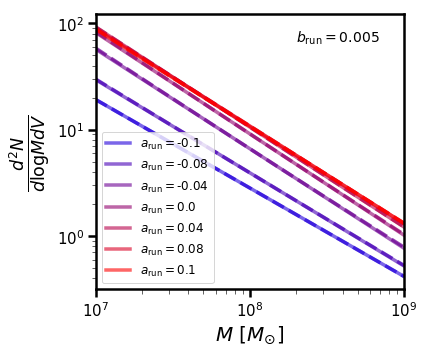

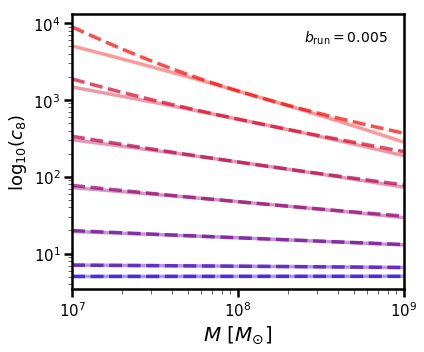

In [2]:
cmap = cm.brg

func = structure_formation_interp_As
lstyle = '-'

ns = 0.965
ar2 = 0.005
a_run = [-0.1, -0.08, -0.04, 0., 0.04, 0.08, 0.1]
color_norm = len(a_run) * 2
c0_1, beta_1, dplawidx_1, losnorm_1 = [], [], [], []
fig = plt.figure(1)
fig.set_size_inches(6,5)
ax1 = plt.subplot(111)
for i, ar in enumerate(a_run):
    m, mfunc, mcrel = func.get_dndm_mc(ns, ar, ar2)
    _, dndm_true, _ = structure_formation_interp_As.model_from_file(ns, ar, ar2, 'As', z=None)
    logm = np.log10(m)

    lab = r'$a_{\rm{run}} = $' + str(ar)
    ax1.loglog(m, m * mfunc, color=cmap((i+1)/color_norm), lw=3.5, linestyle=lstyle, alpha=0.6, label=lab)
    ax1.loglog(m, m * dndm_true, color=cmap((i+1)/color_norm), lw=3.5, linestyle='--', alpha=0.7)

    (_losnorm, _beta, _c0, _dplawidx) = func(ns, ar, ar2)
    c0_1.append(_c0)
    beta_1.append(_beta)
    dplawidx_1.append(_dplawidx)
    losnorm_1.append(_losnorm)
    
ax1.annotate(r'$b_{\rm{run}} = 0.005$', fontsize=14, xy=(0.65,0.9), xycoords='axes fraction')
ax1.set_xlim(10**7, 10**9)
ax1.set_ylabel(r'$\frac{d^2N}{d \log M dV}$', fontsize=25)
ax1.set_xlabel(r'$M \ \left[M_{\odot}\right]$', fontsize=20)
ax1.legend(fontsize=12, loc=3)
plt.tight_layout()
plt.savefig('./figures/massfunction_1.pdf')

fig = plt.figure(2)
fig.set_size_inches(6,5)
ax = plt.subplot(111)
for i, ar in enumerate(a_run):
    m, mfunc, mcrel = func.get_dndm_mc(ns, ar, ar2)
    _, _, mcrel_true = structure_formation_interp_As.model_from_file(ns, ar, ar2, 'As', z=None)

    ax.loglog(m, mcrel, color=cmap((i+1)/color_norm), lw=3.5, linestyle=lstyle, alpha=0.4, label=lab)
    ax.loglog(m, mcrel_true, color=cmap((i+1)/color_norm), lw=3.5, linestyle='--', alpha=0.7)

ax.set_xlim(10**7, 10**9)
ax.annotate(r'$b_{\rm{run}} = 0.005$', fontsize=14, xy=(0.7,0.9), xycoords='axes fraction')
ax.set_ylabel(r'$\log_{10} \left(c_8\right)$', fontsize=18)
ax.set_xlabel(r'$M \ \left[M_{\odot}\right]$', fontsize=20)
plt.tight_layout()
plt.savefig('./figures/mcrelation_1.pdf')

## Now fr a different value of $b_{\rm{run}}$

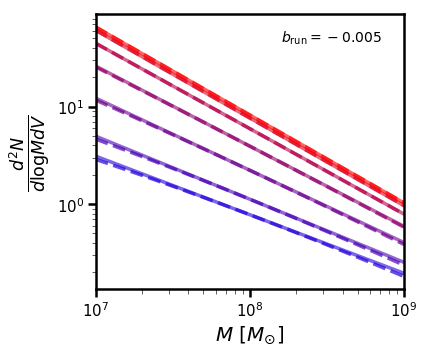

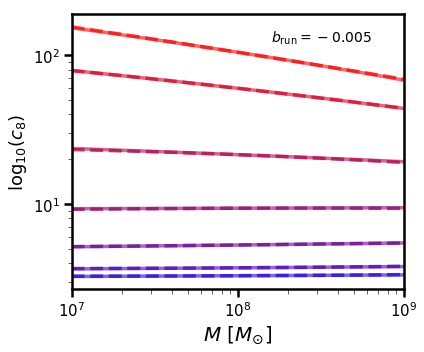

In [3]:
cmap = cm.brg

func = structure_formation_interp_As
lstyle = '-'

ns = 0.965
ar2 = -0.005
#ar2 = 0.00
a_run = [-0.1, -0.08, -0.04, 0., 0.04, 0.08, 0.1]
color_norm = len(a_run) * 2
c0_2, beta_2, dplawidx_2, losnorm_2 = [], [], [], []
fig = plt.figure(1)
fig.set_size_inches(6,5)
ax1 = plt.subplot(111)
for i, ar in enumerate(a_run):
    m, mfunc, mcrel = func.get_dndm_mc(ns, ar, ar2)
    _, dndm_true, _ = structure_formation_interp_As.model_from_file(ns, ar, ar2, 'As', z=None)
    logm = np.log10(m)

    lab = r'$a_{\rm{run}} = $' + str(ar)
    ax1.loglog(m, m * mfunc, color=cmap((i+1)/color_norm), lw=3.5, linestyle=lstyle, alpha=0.6, label=lab)
    ax1.loglog(m, m * dndm_true, color=cmap((i+1)/color_norm), lw=3.5, linestyle='--', alpha=0.7)

    (_losnorm, _beta, _c0, _dplawidx) = func(ns, ar, ar2)
    c0_2.append(_c0)
    beta_2.append(_beta)
    dplawidx_2.append(_dplawidx)
    losnorm_2.append(_losnorm)
ax1.annotate(r'$b_{\rm{run}} = -0.005$', fontsize=14, xy=(0.6,0.9), xycoords='axes fraction')
ax1.set_xlim(10**7, 10**9)
ax1.set_ylabel(r'$\frac{d^2N}{d \log M dV}$', fontsize=25)
ax1.set_xlabel(r'$M \ \left[M_{\odot}\right]$', fontsize=20)
plt.tight_layout()
plt.savefig('./figures/massfunction_2.pdf')

fig = plt.figure(2)
fig.set_size_inches(6,5)
ax = plt.subplot(111)
for i, ar in enumerate(a_run):
    m, mfunc, mcrel = func.get_dndm_mc(ns, ar, ar2)
    _, _, mcrel_true = structure_formation_interp_As.model_from_file(ns, ar, ar2, 'As', z=None)

    ax.loglog(m, mcrel, color=cmap((i+1)/color_norm), lw=3.5, linestyle=lstyle, alpha=0.6, label=lab)
    ax.loglog(m, mcrel_true, color=cmap((i+1)/color_norm), lw=3.5, linestyle='--', alpha=0.7)

ax.set_xlim(10**7, 10**9)
ax.annotate(r'$b_{\rm{run}} = -0.005$', fontsize=14, xy=(0.6,0.9), xycoords='axes fraction')
ax.set_ylabel(r'$\log_{10} \left(c_8\right)$', fontsize=18)
ax.set_xlabel(r'$M \ \left[M_{\odot}\right]$', fontsize=20)
plt.tight_layout()
plt.savefig('./figures/mcrelation_2.pdf')

In [4]:
cmap = cm.brg

func = structure_formation_interp_As
lstyle = '-'

ns = 0.965
ar2 = 0.00
a_run = [-0.1, -0.08, -0.04, 0., 0.04, 0.08, 0.1]
color_norm = len(a_run) * 2
c0_3, beta_3, dplawidx_3, losnorm_3 = [], [], [], []

for i, ar in enumerate(a_run):
    m, mfunc, mcrel = func.get_dndm_mc(ns, ar, ar2)
    _, dndm_true, _ = structure_formation_interp_As.model_from_file(ns, ar, ar2, 'As', z=None)
    logm = np.log10(m)

    lab = r'$a_{\rm{run}} = $' + str(ar)
    
    (_losnorm, _beta, _c0, _dplawidx) = func(ns, ar, ar2)
    c0_3.append(_c0)
    beta_3.append(_beta)
    dplawidx_3.append(_dplawidx)
    losnorm_3.append(_losnorm)

## Plot the mapping between $\vec{q}_{L}$ and $\vec{q}_{P}$

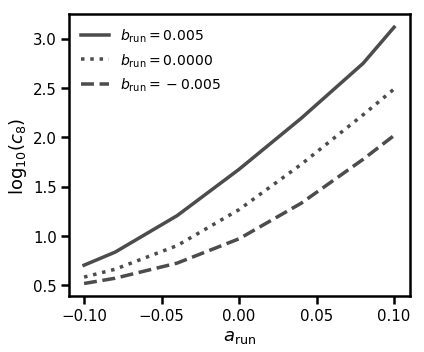

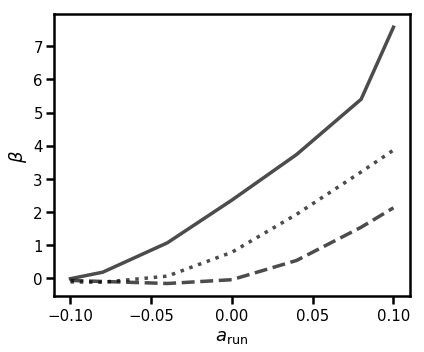

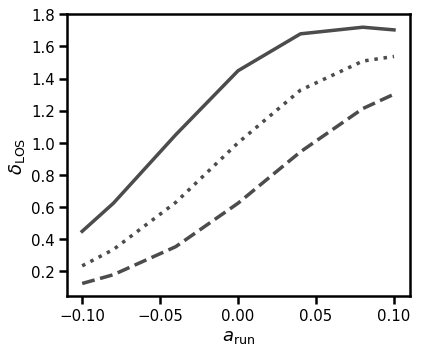

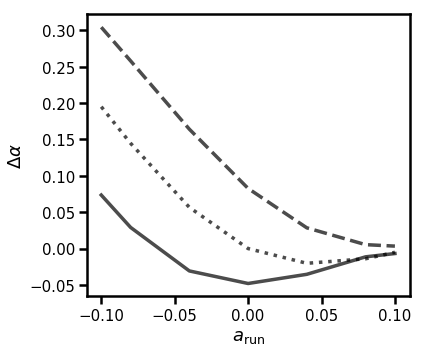

In [5]:

fig = plt.figure(3)
fig.set_size_inches(6,5)
ax = plt.subplot(111)
ax.plot(a_run, np.log10(c0_1), color='k', lw=3.5, linestyle='-', alpha=0.7, label=r'$b_{\rm{run}} = 0.005$')
ax.plot(a_run, np.log10(c0_3), color='k', lw=3.5, linestyle=':', alpha=0.7, label=r'$b_{\rm{run}} = 0.0000$')
ax.plot(a_run, np.log10(c0_2), color='k', lw=3.5, linestyle='--', alpha=0.7, label=r'$b_{\rm{run}} = -0.005$')
ax.set_ylabel(r'$\log_{10} \left(c_8\right)$', fontsize=18)
ax.set_xlabel(r'$a_{\rm{run}}$', fontsize=18)
ax.legend(fontsize=14, frameon=False)
plt.tight_layout()
plt.savefig('./figures/mapping_c8.pdf')

fig = plt.figure(4)
fig.set_size_inches(6,5)
ax = plt.subplot(111)
ax.plot(a_run, beta_1, color='k', lw=3.5, linestyle='-', alpha=0.7)
ax.plot(a_run, beta_3, color='k', lw=3.5, linestyle=':', alpha=0.7)
ax.plot(a_run, beta_2, color='k', lw=3.5, linestyle='--', alpha=0.7)
ax.set_ylabel(r'$\beta$', fontsize=18)
ax.set_xlabel(r'$a_{\rm{run}}$', fontsize=18)
plt.tight_layout()
plt.savefig('./figures/mapping_dbeta.pdf')

fig = plt.figure(5)
fig.set_size_inches(6,5)
ax = plt.subplot(111)
ax.plot(a_run, losnorm_1, color='k', lw=3.5, linestyle='-', alpha=0.7)
ax.plot(a_run, losnorm_3, color='k', lw=3.5, linestyle=':', alpha=0.7)
ax.plot(a_run, losnorm_2, color='k', lw=3.5, linestyle='--', alpha=0.7)
ax.set_ylabel(r'$\delta_{\rm{LOS}}$', fontsize=18)
ax.set_xlabel(r'$a_{\rm{run}}$', fontsize=18)
plt.tight_layout()
plt.savefig('./figures/mapping_dlos.pdf')

fig = plt.figure(6)
fig.set_size_inches(6,5)
ax = plt.subplot(111)
ax.plot(a_run, dplawidx_1, color='k', lw=3.5, linestyle='-', alpha=0.7)
ax.plot(a_run, dplawidx_3, color='k', lw=3.5, linestyle=':', alpha=0.7)
ax.plot(a_run, dplawidx_2, color='k', lw=3.5, linestyle='--', alpha=0.7)
ax.set_ylabel(r'$\Delta \alpha$', fontsize=18)
ax.set_xlabel(r'$a_{\rm{run}}$', fontsize=18)

plt.tight_layout()
plt.savefig('./figures/mapping_dalpha.pdf')